### Slade Brooks
### M13801712
#### AEEM6042 Module 4 Assignment
#### 03.26.25

In [735]:
import sys, os
sys.path.append(os.getcwd() + r"/..")
from utils.normshock import normshock
from utils.compflow import compflow
from utils.thetabetaM import shockRelation
from scipy.optimize import fsolve
import numpy as np

# Problem 1

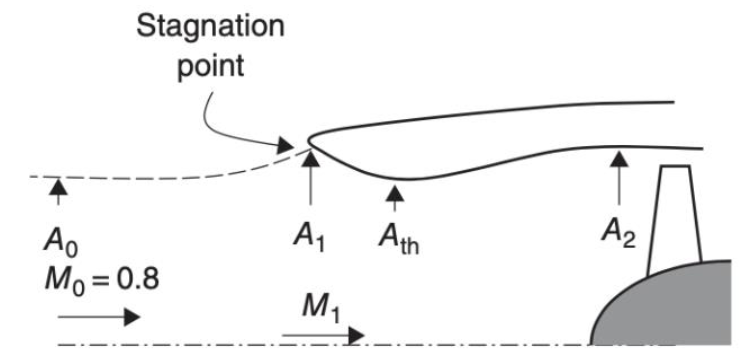

\begin{align*}
    M_0=0.8;\quad A_0/A_1=0.92;\quad \gamma=1.4
\end{align*}

## Part A

At the stagnation point, the static pressure $P$ is equal to the total pressure $P_{t0}$. We can rearrange the pressure
coefficient equation using isentropic relations to determine the pressure coefficient at the stagnation point:

\begin{align*}
    C_P=\frac{2(P-P_0)}{\gamma P_0M_0^2}
\end{align*}

\begin{align*}
    P_{t0}=P_0\left(\frac{P_{t0}}{P_0}\right)
\end{align*}

\begin{align*}
    C_P=\frac{2P_0\left(\frac{P_{t0}}{P_0}-1\right)}{\gamma P_0M_0^2} \\
    C_P=\frac{2\left(\frac{P_{t0}}{P_0}-1\right)}{\gamma M_0^2}
\end{align*}

\begin{align*}
    \frac{P_{t0}}{P_0}=\left(1+\frac{\gamma-1}{2}M_0^2\right)^{\frac{\gamma}{\gamma-1}} \\
    \frac{P_{t0}}{P_0}=\left(1+\frac{1.4-1}{2}0.8^2\right)^{\frac{1.4}{1.4-1}}=1.52434
\end{align*}

\begin{align*}
    C_P=\frac{2(1.52434-1)}{1.4(0.8)^2} \\
    \fbox{$C_P=1.17$}
\end{align*}

## Part B

We can use the given inlet conditions and area ratio to solve the area ratio equation for $M_1$.

In [736]:
# givens
M0 = 0.8
y = 1.4

# fsolve area ratio equation to determine M1
A0_A1 = 0.92
def Aratio(M1):
    Arat = M1/M0*((1 + (y-1)/2*M0**2)/(1 + (y-1)/2*M1**2))**((y + 1)/(2*(y - 1)))
    return Arat - A0_A1

M1 = fsolve(Aratio, 0.01)[0]
print(f"M1 = {M1:.2f}")

M1 = 0.66


\begin{align*}
    \fbox{$M_1=0.66$}
\end{align*}

## Part C

We can plug in the known values to the area ratio equation to solve. We will create a function for area ratio including
the total pressure loss term to use for this.

In [737]:
# fsolve area ratio equation to determine M1
def Ax_Ay(Mx, My, Ptx_Pty):
    Arat = 1/Ptx_Pty*My/Mx*((1 + (y-1)/2*Mx**2)/(1 + (y-1)/2*My**2))**((y + 1)/(2*(y - 1)))
    return Arat

# givens
Mth = 0.75
Pt_Pth = 1.

# solve for area ratio
A1_Ath = Ax_Ay(M1, Mth, Pt_Pth)
print(f"A1/Ath = {A1_Ath:.2f}")

A1/Ath = 1.06


\begin{align*}
    \fbox{$\frac{A_1}{A_{th}}=1.06$}
\end{align*}

## Part D

Same process as Part C.

In [738]:
# givens
M2 = 0.5
Pt_Pth = 0.98

# solve for area ratio
A2_Ath = Ax_Ay(M2, Mth, Pt_Pth)
print(f"A2/Ath = {A2_Ath:.2f}")

A2/Ath = 1.29


\begin{align*}
    \fbox{$\frac{A_2}{A_{th}}=1.29$}
\end{align*}

## Part E

We can determine the non-dimensional additional drag from the chart in the slides at $M_0=0.8$ and $M_1=0.66$:

\begin{align*}
    \fbox{$\frac{D_{add}}{P_0A_1}=0.0125$}
\end{align*}

# Problem 2

\begin{align*}
    M_0=0.2;\quad M_2=0.65;\quad \frac{P_{t2}}{P_{t0}}=0.98
\end{align*}

\begin{align*}
    \frac{A_0}{A_2}=\frac{P_{t2}}{P_{t0}}\frac{M_2}{M_0}\left[
        \frac{1 + \frac{\gamma-1}{2}M_0^2}{1 + \frac{\gamma-1}{2}M_2^2}
    \right]^{\frac{\gamma+1}{2(\gamma-1)}} \\
    \frac{A_0}{A_2}=0.98\cdot \frac{0.65}{0.2}\left[
        \frac{1 + \frac{1.4-1}{2}0.2^2}{1 + \frac{1.4-1}{2}0.65^2}
    \right]^{\frac{1.4+1}{2(1.4-1)}}=2.557
\end{align*}

\begin{align*}
    \fbox{$\frac{A_0}{A_2}=2.557$}
\end{align*}

# Problem 3

\begin{align*}
    M_0=1.6;\quad \frac{A_0}{A_1}=0.9;\quad \frac{A_2}{A_1}=1.2;\quad \frac{P_{t2}}{P_{t1}}=0.95
\end{align*}

## Part A

First we need to find the mach number after the normal shock $M_{0y}$.

In [739]:
# solve normal shock relations with code from proj. 0
y = 1.4
M0 = 1.6
M0y, Pty_Ptx, _, _, _ = normshock(M0, y)
print(f"M0y = {M0y:.2f}")

M0y = 0.67


Now we assume that $A_0$ is constant until the shock. We can use the known relation between $A_0$ and $A_1$ to find
$M_1$, assuming no total pressure loss between the shock and the cowl.

In [740]:
# fsolve area ratio equation to determine M1
A0_A1 = 0.9
def Aratio(M1):
    Arat = M1/M0y*((1 + (y-1)/2*M0y**2)/(1 + (y-1)/2*M1**2))**((y + 1)/(2*(y - 1)))
    return Arat - A0_A1

M1 = fsolve(Aratio, 0.01)[0]
print(f"M1 = {M1:.2f}")

M1 = 0.56


\begin{align*}
    \fbox{$M_1=0.56$}
\end{align*}

## Part B

We can determine the total pressure ratio from the normal shock relation total pressure ratio and the given ratio
between 1 and 2. The normal shock pressure ratio is equivalent to $\frac{P_{t1}}{P_{t0}}$ since we assumed only pressure
loss across the shock until inside the duct.

In [741]:
# determine total ratio from part a shock relation ratio * given ratio
Pt2_Pt1 = 0.95
Pt1_Pt0 = Pty_Ptx
Pt2_Pt0 = Pt2_Pt1*Pt1_Pt0
print(f"Pt2/Pt0 = {Pt2_Pt0:.2f}")

Pt2/Pt0 = 0.85


\begin{align*}
    \fbox{$\pi_d=0.85$}
\end{align*}

# Problem 4

## Part A

We will need to solve across both oblique shocks for the total pressure ratio using theta-beta-Mach relations and
oblique shock solving methods.

In [742]:
# solve across oblique shock #1
# use shock relation to get shock angle beta
y = 1.4
M0 = 2.5
theta1 = 8.
B1 = shockRelation(M=M0, theta=theta1, y=y)
print(f"beta1 = {B1:.2f} deg")

# get normal mach number and then solve like normal shock
M1n = M0*np.sin(np.deg2rad(B1))
M2n, Pty1_Ptx1, _, _, _ = normshock(M1n, y)
print(f"Pty_Ptx1 = {Pty1_Ptx1:.3f}")

# determine the actual M2 (really its M1)
M2 = M2n/np.sin(np.deg2rad(B1) - np.deg2rad(theta1))
print(f"M1 = {M2:.2f}")

# solve across oblique shock #2
# shock relations again
theta2 = 12.
B2 = shockRelation(M=M2, theta=theta2, y=y)
print(f"\nbeta2 = {B2:.2f} deg")

# get normal mach number and then solve like normal shock
M3n = M2*np.sin(np.deg2rad(B2))
M4n, Pty2_Ptx2, _, _, _ = normshock(M3n, y)
print(f"Pty_Ptx2 = {Pty2_Ptx2:.3f}")

# determine the actual M3 (really its M2)
M3 = M4n/np.sin(np.deg2rad(B2) - np.deg2rad(theta2))
print(f"M2 = {M3:.2f}")

# solve across normal shock
# lastly solve across the terminal normal shock
M4, Pty3_Ptx3, _, _, _ = normshock(M3, y)
print(f"\nM3 = {M4:.2f}")
print(f"Pty_Ptx3 = {Pty3_Ptx3:.3f}")

# solve for total pressure ratio
Pt_Pt0 = Pty1_Ptx1*Pty2_Ptx2*Pty3_Ptx3
print(f"\ntotal total pressure ratio = {Pt_Pt0:.3f}")

beta1 = 30.01 deg
Pty_Ptx1 = 0.987
M1 = 2.17

beta2 = 38.39 deg
Pty_Ptx2 = 0.970
M2 = 1.72

M3 = 0.64
Pty_Ptx3 = 0.848

total total pressure ratio = 0.813


\begin{align*}
    \fbox{$\frac{P_t}{P_{t0}}=0.813$}
\end{align*}

## Part B

We will use the normal shock relations to determine the total pressure loss across a normal shock inlet at the same
inlet mach number.

In [743]:
M0 = 2.5
y = 1.4
Pty_Ptx = normshock(M0, y)[1]
print(f"Pty_Ptx = {Pty_Ptx:.2f}")

Pty_Ptx = 0.50


Solving just the normal shock shows that a pitot inlet would have lost 50% of the total pressure through the inlet,
whereas part a showed that multiple ramps with a terminal normal shock lost only 18.7% through the inlet.

# Problem 5

\begin{align*}
    \frac{A_e}{A^*}=2.4;\quad P_t=100\text{kPa}
\end{align*}

## Part A

First, we can (assuming the nozzle is choked) solve the sonic area ratio equation for the Mach number at the exit of the nozzle.

In [744]:
# assume spec. heat ratio is 1.33 (hot)
y = 1.33
Aratio = 2.4
Pt = 100.           # total pressure in nozzle (kPa)

# function to fsolve using compflow code from proj. 0
def MA_Astar(M):
    A_Astar = compflow(M, y)[3]
    return A_Astar - Aratio

# use fsolve to find where area ratio is 2.4
Me = fsolve(MA_Astar, 1.1)[0]
print(f"Me = Mx = {Me:.2f}")

# find static pressure at exit
Pe_Pte = compflow(Me, y)[1]
Pe = Pe_Pte*Pt
print(f"Pe = Px = {Pe:.2f} kPa")

Me = Mx = 2.33
Pe = Px = 7.56 kPa


We know that the exit Mach number should be what is seen at the front of the normal shock ($M_x$), so we can use normal
shock relations to find the conditions at y.

In [745]:
# calculated mach @ normal shock
Mx = Me

# use normal shock code from proj. 0
My, Pty_Ptx, Py_Px, rhoy_rhox, Ty_Tx = normshock(Mx, y)
print(f"My = {My:.2f}; Pty_Ptx = {Pty_Ptx:.3f}; Py_Px = {Py_Px:.3f}; rhoy_rhox = {rhoy_rhox:.3f}; Ty_Tx = {Ty_Tx:.3f}")

# then use static pressure ratio to get static pressure at y
Px = Pe
Py = Px*Py_Px
print(f"Py = {Py:.2f} kPa")

My = 0.52; Pty_Ptx = 0.547; Py_Px = 6.069; rhoy_rhox = 3.340; Ty_Tx = 1.817
Py = 45.90 kPa


\begin{align*}
    \fbox{$P_0=45.9$ kPa}
\end{align*}

## Part B

We will continue assuming the nozzle is isentropic, so the total temperature should be constant throughout (except
across the shock). We will resuse the compressible flow to get the static temp at e/x, then the shock relations to get
the static at y.

In [746]:
# calculate total temp thru nozzle
Tth = 350 + 273.15       # static temp (K)
Mth = 1.                 # assumed Mth=1 since nozzle is choked
Tth_Ttth = compflow(Mth, y)[0]
Ttth = Tth/Tth_Ttth      # total temp (K)

# get static temp at x
Tx_Ttx = compflow(Mx, y)[0]
Ttx = Ttth               # constant total temp
Tx = Ttx*Tx_Ttx          # static temp at x (K)

# use shock relations from before
Ty = Tx*Ty_Tx            # static temp at y (K)
print(f"Ty = {Ty:.2f} K")

Ty = 695.18 K


\begin{align*}
    \fbox{$T_y=695.18$ K}
\end{align*}

## Part C

Last, we will use MFP to calculate the mass flow rate in the nozzle. Still assuming nozzle is choked so $M=1$ at the throat.

In [747]:
# calculate MFP from comp flow code from proj. 0
MFP = compflow(1., y)[4]/16.9115

# solve for mdot from MFP
A = 0.25        # throat area (m^2)
Pt *= 1000.     # total pressure (Pa)
Tt = Ttth
mdot = MFP*A*Pt/np.sqrt(Tt)
print(f"mdot = {mdot:.2f} kg/s")

mdot = 36.90 kg/s


\begin{align*}
    \fbox{$\dot{m}=36.90$ kg/s}
\end{align*}

# Problem 6

In [748]:
# givens
y = 1.33            # spec. heat ratio
R = 0.287           # gas const. (kJ/kg-K)
mdot = 75.          # mass flow rate (kg/s)
Pt8 = 350.          # total pres @ throat (kPa)
Tt8 = 1600.         # total temp @ throat (K)
A9_A8 = 1.8
Pt9_Pt8 = 0.98
CD = 0.98
P0 = 40.            # ambient pressure (kPa)

First, we will determine the effective throat area and use it to find the conditions at the exit.

In [749]:
# calculate effective throat area
Mth = 1.
MFP8 = compflow(Mth, y)[4]/np.sqrt(R*1000.)
A8e = mdot*np.sqrt(Tt8)/(Pt8*1000.*MFP8)
print(f"A8e = {A8e:.3f} m^2")

# calculate actual throat area
A8 = A8e/CD
r8 = np.sqrt(A8/np.pi)
print(f"A8 = {A8:.3f} m^2")
print(f"r8 = {r8:.3f} m")

# calculate exit size
A9 = A8*A9_A8
r9 = np.sqrt(A9/np.pi)
print(f"A9 = {A9:.3f} m^2")
print(f"r9 = {r9:.3f} m")
print(f"A9/A8 = {A9/A8:.2f}")

A8e = 0.216 m^2
A8 = 0.220 m^2
r8 = 0.265 m
A9 = 0.397 m^2
r9 = 0.355 m
A9/A8 = 1.80


Now we will solve the ideal nozzle.

In [750]:
# find ideal sonic exit area ratio
A9i_Astar = A9/(CD*A8)

# function to fsolve using compflow code from proj. 0
def MA_Astar(M):
    A_Astar = compflow(M, y)[3]
    return A_Astar - A9i_Astar

# fsolve for ideal M9
M9i = fsolve(MA_Astar, 1.1)[0]
print(f"M9i = {M9i:.2f}")

# determine comp flow relations
P9i_Pt9i = compflow(M9i, y)[1]
P9i = Pt8*P9i_Pt9i
print(f"P9i = {P9i:.2f} kPa")

# calculate ideal V9 from gross guy
V9i = np.sqrt(R*1000.*Tt8)*np.sqrt(2*y/(y - 1)*(1 - (P9i/Pt8)**((y - 1)/y)))
print(f"V9i = {V9i:.2f} m/s")

M9i = 2.06
P9i = 41.49 kPa
V9i = 1233.19 m/s


Now we will solve the real nozzle.

In [ ]:
# find ideal sonic exit area ratio
Pt9 = Pt8*Pt9_Pt8
A9_Astar = Pt9_Pt8*A9/(CD*A8)

# function to fsolve using compflow code from proj. 0
def MA_Astar(M):
    A_Astar = compflow(M, y)[3]
    return A_Astar - A9_Astar

# fsolve for ideal M9
M9 = fsolve(MA_Astar, 1.1)[0]
print(f"M9 = {M9:.2f}")

# determine comp flow relations
P9_Pt9 = compflow(M9, y)[1]
P9 = Pt9*P9_Pt9
print(f"P9 = {P9:.2f} kPa")

# calculate ideal V9 from gross guy
V9 = np.sqrt(R*1000.*Tt8)*np.sqrt(2*y/(y - 1)*(1 - (P9/Pt8)**((y - 1)/y)))
print(f"V9 = {V9:.2f} m/s")

# lastly determine CV
CV = V9/V9i
print(f"CV = {CV:.3f}")

M9 = 2.03
P9 = 42.13 kPa
V9 = 1229.86 m/s
CV = 0.994


Now we can calculate the gross thrust and use that to determine other nozzle characteristics.

In [752]:
# calculate Cfg
Cfg = CD*CV*np.sqrt((1 - (P9i/Pt8)**((y - 1)/y))/(1 - (P0/Pt8)**((y - 1)/y)))*(1 + (y - 1)/(2*y)*(1 - P0/P9)/ \
    ((Pt9/P9)**((y - 1)/y) - 1))
print(f"Cfg = {Cfg:.3f}")

Cfg = 0.977


From Figure 10.60b: $\quad \theta=10^{\circ}$ \
From Figure 10.61: $\quad \alpha=3.5^{\circ}$

We can determine the nozzle length from the radii and $\alpha$, and calculate the actual thrust.

In [753]:
# calculate nozzle length
alpha = np.deg2rad(3.5)
Ls = (r9 - r8)/np.tan(alpha)
print(f"Ls = {Ls:.2f} m")

# calculate actual thrust
Fg = mdot*V9 + (P9 - P0)*A9
print(f"Fg = {Fg/1000.:.2f} kN")

Ls = 1.48 m
Fg = 92.24 kN


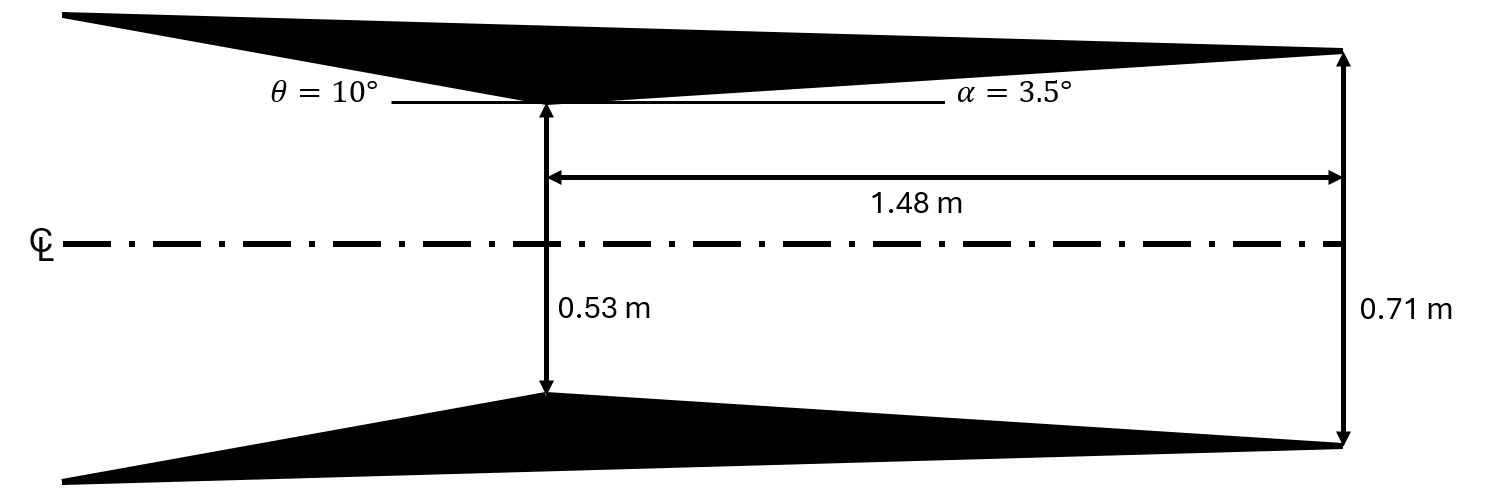

\begin{align*}
    \fbox{$C_{fg}=0.98$} \\
    \fbox{$F_{g}=91.9$ kN} \\
    \fbox{$C_{V}=0.994$}
\end{align*}